# Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset. \
The objective is to predict the value of prices of the house using the given features.

In [1]:
# Importing required libraries
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Loading the Dataset
boston_data = pd.read_csv("boston-housing-dataset.csv")

In [13]:
# Creating Dataframe
boston = pd.DataFrame(boston_data)

## Column Details
CRIM: Per capita crime rate by town \
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft  \
INDUS: Proportion of non-retail business acres per town \
CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise) \
NOX: Nitric oxide concentration (parts per 10 million) \
RM: Average number of rooms per dwelling \
AGE: Proportion of owner-occupied units built prior to 1940 \
DIS: Weighted distances to five Boston employment centers \
RAD: Index of accessibility to radial highways \
PTRATIO: Pupil-teacher ratio by town \
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town \
LSTAT: Percentage of lower status of the population \
MEDV: Median value of owner-occupied homes in $1000s 

In [14]:
# DataFrame
boston

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [15]:
# DataFrame Information
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [16]:
# Dataset Description
boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
boston.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [18]:
# Checking fo NULL values
boston.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

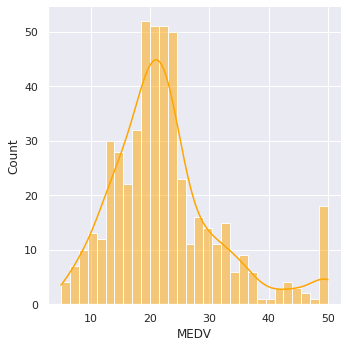

In [19]:
# Distribution of "MEDV"
sns.set(rc={'figure.figsize':(15,10)})
sns.displot(boston['MEDV'], bins=30, kde=True, color='orange')
plt.show()

# 'MEDV' is normally distributed with few outliers

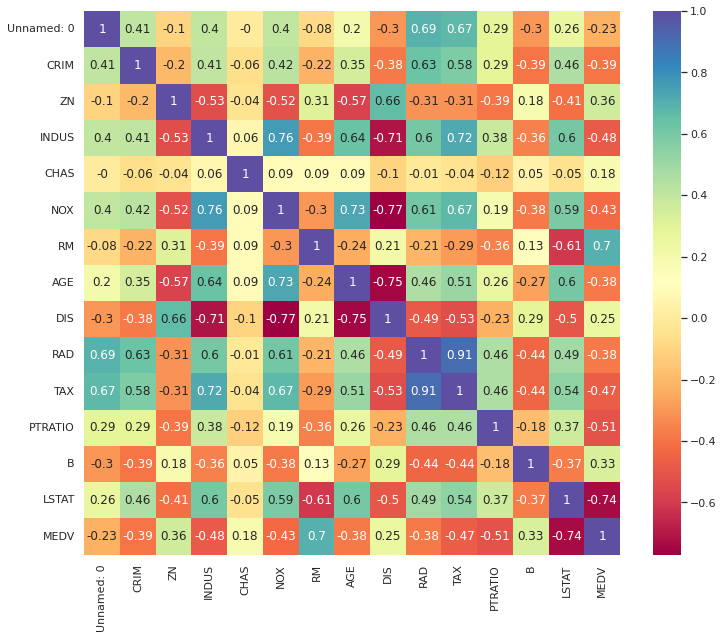

In [21]:
# Correlation matrix
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = boston.corr().round(2)
# Heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap='Spectral');

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74). \
An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

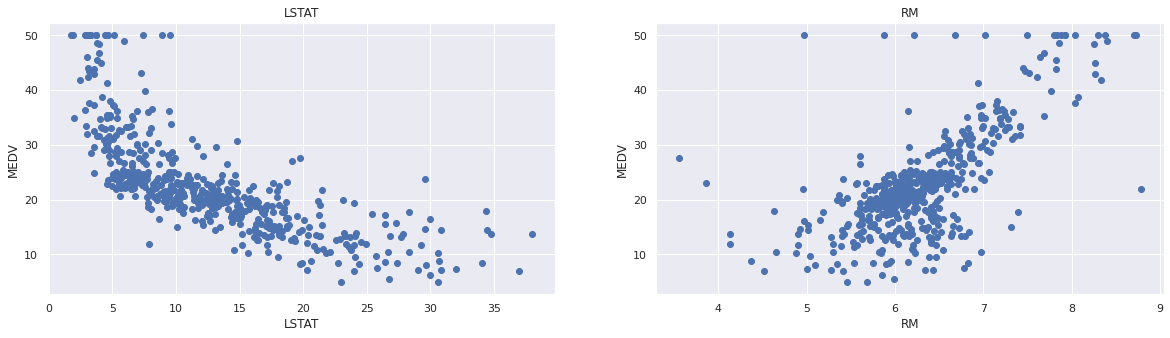

In [76]:
# Scatter plot to check how these features vary with 'MEDV'
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50. \
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.


In [25]:
# Creating DataFrames for Independent and Dependent variables separately
x = pd.DataFrame(np.c_[boston["LSTAT"], boston["RM"]], columns=["LSTAT", "RM"])
y = pd.DataFrame(boston["MEDV"])

In [59]:
print(x.shape)
print(y.shape)

(506, 2)
(506, 1)


In [65]:
# Creating training and testing datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [66]:
print("X-train Shape:", x_train.shape)
print("Y-train Shape:", y_train.shape)
print("X-test Shape: ", x_test.shape)
print("Y-test Shape: ", y_test.shape)

X-train Shape: (404, 2)
Y-train Shape: (404, 1)
X-test Shape:  (102, 2)
Y-test Shape:  (102, 1)


In [67]:
# Fitting the model into train dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [68]:
# Evaluating the model for training dataset
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("For Training Dataset: ")
print("RMSE: ", rmse)
print("R2: ", r2)

For Training Dataset: 
RMSE:  5.637129335071195
R2:  0.6300745149331701


In [69]:
# Evaluating the model for testing dataset
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("For Testing Dataset: ")
print("RMSE: ", rmse)
print("R2: ", r2)

For Testing Dataset: 
RMSE:  5.137400784702911
R2:  0.6628996975186952
